In [1]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from skimage import io, color
import numpy as np

def show(image, show=True):
    if show:
        plt.imshow(image, cmap='gray')
        plt.show()
    return image

image = show(color.rgb2gray(io.imread('dog.jpg')))

<Figure size 640x480 with 1 Axes>

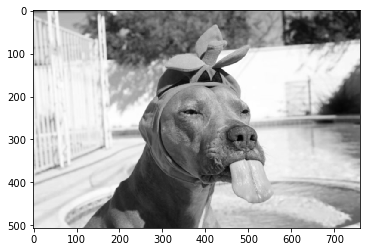

In [2]:
def conv2d(image, kernel):
    result = np.zeros(image.shape)
    for x in range(len(image)):
        for y in range(len(image[x])):
            result[x][y] = image[x][y]
    kernel_size_x = len(kernel)
    if kernel_size_x > 0:
        kernel_size_y = len(kernel[0])
    else:
        kernel_size_y = 0
    kernel_sum = 0
    for i in range(kernel_size_x):
        for j in range(kernel_size_y):
            kernel_sum += np.absolute(kernel[i][j])
    if kernel_sum == 0:
        kernel_sum = 1
    for x in range(int(kernel_size_x/2), len(image)-int(kernel_size_x/2)):
        for y in range(int(kernel_size_y/2), len(image[0])-int(kernel_size_y/2)):
            #convolve
            temp_result = 0
            for i in range(-int(kernel_size_x/2),int(kernel_size_x/2)+1):
                for j in range(-int(kernel_size_y / 2), int(kernel_size_y / 2)+1):
                    temp_result += 1/kernel_sum * kernel[i+int(kernel_size_x/2)][j+int(kernel_size_y/2)] * image[x+i][y+j]
            result[x][y] = temp_result
    return result

gauss_kernel = [[1, 2, 1], [2, 4, 2], [1, 2, 1]]
image_smooth = show(conv2d(image, gauss_kernel))

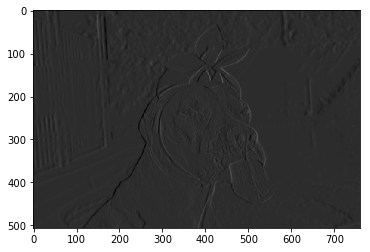

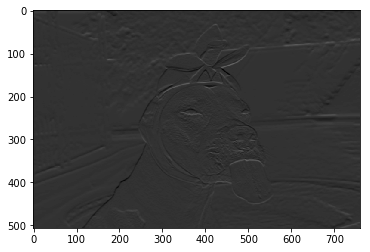

In [3]:
sx = [[-1,0,1],[-2,0,2],[-1,0,1]]
sy = [[-1,-2,-1],[0,0,0],[1,2,1]]

def sobel_x(image):
    return conv2d(image,sx)

def sobel_y(image):
    return conv2d(image,sy)

image_edges_x = show(sobel_x(image_smooth))
image_edges_y = show(sobel_y(image_smooth))

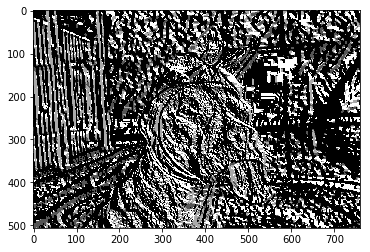

In [4]:
def index_min(_list):
    min = 2*np.pi
    index = -1
    for i in range(len(_list)):
        if _list[i] < min:
            min = _list[i]
            index = i
    assert 0 <= index <= 3
    return index

def round_help(_list,direction):
    result = []
    for x in _list:
        result.append(np.absolute(x-direction))
    return index_min(result)

def round(directions):
    directions_2 = np.zeros(directions.shape)
    for x in range(len(directions_2)):
        for y in range(len(directions_2[x])):
            directions_2[x][y] = directions[x][y]
    result = np.zeros(directions.shape)
    pi = np.pi
    neighbor_directions = [0, pi/4, pi/2, 3*pi/4]
    for x in range(len(directions)):
        for y in range(len(directions[x])):
            result[x][y] = neighbor_directions[round_help(neighbor_directions, directions_2[x][y])]
    return result

image_directions = show(round(np.arctan2(image_edges_x, image_edges_y)))

In [ ]:
def gradient_magnitude(edges_x, edges_y):
    result = np.zeros(edges_x.shape)
    for x in range(len(edges_x)):
        for y in range(len(edges_x[x])):
            result[x][y] = np.sqrt(np.power(edges_x[x][y], 2) + np.power(edges_y[x][y], 2))
    return result

gradient_magnitude = show(gradient_magnitude(image_edges_x, image_edges_y))

In [ ]:
def angle_to_indizes(angle):
    if angle==0: return (0,1)
    if angle==np.pi/4: return (1,1)
    if angle==np.pi/2: return (1,0)
    if angle==3*np.pi/4: return (1,-1)
    if angle==np.pi: return (0,-1)
    if angle==-np.pi/4: return (-1,1)
    if angle==-np.pi/2: return (-1,0)
    if angle==-3*np.pi/4: return (-1,-1)

def non_maximum_suppression(image, directions):
    result = np.zeros(image.shape)
    for x in range(len(image)):
        for y in range(len(image[x])):
            result[x][y] = image[x][y]
    for x in range(len(image)):
        for y in range(len(image[x])):
            for i in range(-1,1):
                for j in range(-1,1):
                    if 0 <= x+i < len(image) and 0 <= y+j < len(image[x]) and (i!=0 or j!=0):
                        if image[x][y] <= image[x+i][y+j]:
                            result[x][y] = 0
    return result

non_maximum_suppression = show(non_maximum_suppression(gradient_magnitude, image_directions))

In [ ]:
nms_magnitude = np.zeros(non_maximum_suppression.shape)
for x in range(len(nms_magnitude)):
    for y in range(len(nms_magnitude[x])):
        nms_magnitude[x][y] = gradient_magnitude[x][y] - non_maximum_suppression[x][y]
show(nms_magnitude)